In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
def plotImage(x, y, im):
    bb = Bbox.from_bounds(x,y,1,1)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2,
                        norm = None,
                        origin=None,
                        clip_on=False)

    bbox_image.set_data(im)
    ax.add_artist(bbox_image)

In [3]:
df = pd.read_csv('./Football-data.co.uk/E0/17-18.csv', index_col=0)

In [4]:
df.head()
    

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,xGH,xGA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,2.436114,1.366254
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,0.755044,1.567297
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,1.565334,0.811095
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,1.324664,1.467438
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,0.522517,0.485924


In [5]:
df = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'xGH', 'xGA']]

In [6]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,xGH,xGA
0,Arsenal,Leicester,4,3,2.436114,1.366254
1,Brighton,Man City,0,2,0.755044,1.567297
2,Chelsea,Burnley,2,3,1.565334,0.811095
3,Crystal Palace,Huddersfield,0,3,1.324664,1.467438
4,Everton,Stoke,1,0,0.522517,0.485924


In [7]:
grouped = df.groupby(by=['HomeTeam'])[['FTHG', 'FTAG', 'xGH', 'xGA']].sum()
grouped_away =  df.groupby(by=['AwayTeam'])[['FTHG', 'FTAG', 'xGH', 'xGA']].sum()
grouped_away.columns = ['FTHGa', 'FTAGa', 'xGHa', 'xGAa']

In [8]:
grouped = grouped.merge(grouped_away, right_index=True, left_index=True)

In [9]:
grouped.head()

,FTHG,FTAG,xGH,xGA,FTHGa,FTAGa,xGHa,xGAa
HomeTeam,,,,,,,,
Arsenal,11,3,8.558615,3.354644,7,1,5.638570,4.992484
Bournemouth,3,5,4.343144,5.629795,7,1,7.449644,2.433982
Brighton,5,4,4.701741,5.675799,6,1,6.336452,3.192855
Burnley,2,2,3.385150,3.583790,4,6,9.055355,2.808653
Chelsea,4,4,3.892303,4.074956,4,9,5.177849,3.851616


In [10]:
grouped['goals'] = grouped['FTHG'] + grouped['FTAGa']
grouped['goals_conceded'] = grouped['FTAG'] + grouped['FTHGa']
grouped['xG'] = grouped['xGH'] + grouped['xGAa']
grouped['xG_conceded'] = grouped['xGA'] + grouped['xGHa']

In [11]:
grouped.sort_values('xG', ascending=False).head()

,FTHG,FTAG,xGH,xGA,FTHGa,FTAGa,xGHa,xGAa,goals,goals_conceded,xG,xG_conceded
HomeTeam,,,,,,,,,,,,
Man City,18,3,11.051992,2.553490,1,11,2.588936,8.158285,29,4,19.210277,5.142427
Tottenham,3,3,9.083093,2.527626,2,12,3.202013,7.257167,15,5,16.340261,5.729640
Man United,14,0,10.555885,3.055987,2,7,6.405144,5.734628,21,2,16.290514,9.461131
Liverpool,6,1,9.323565,2.133217,11,7,7.025495,6.854071,13,12,16.177637,9.158711
Arsenal,11,3,8.558615,3.354644,7,1,5.638570,4.992484,12,10,13.551098,8.993214


In [12]:
to_plot = grouped[['goals', 'goals_conceded', 'xG', 'xG_conceded']]
to_plot.head()

,goals,goals_conceded,xG,xG_conceded
HomeTeam,,,,
Arsenal,12,10,13.551098,8.993214
Bournemouth,4,12,6.777126,13.079439
Brighton,6,10,7.894596,12.012251
Burnley,8,6,6.193803,12.639145
Chelsea,13,8,7.743919,9.252805


In [23]:
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
line = np.linspace(0, 32, 100)

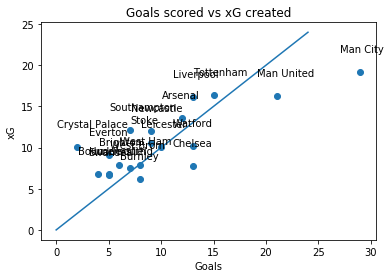

In [14]:
plt.figure()
plt.scatter(to_plot['goals'], to_plot['xG'])
plt.plot(line, line)
plt.xlabel('Goals')
plt.ylabel('xG')
plt.title('Goals scored vs xG created')

for label, x, y in zip(to_plot.index.values, to_plot['goals'], to_plot['xG']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points')

In [15]:
from matplotlib.pyplot import imread
teams = to_plot.index.values.tolist()
teams = [team.lower() for team in teams]

In [26]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
for team, x, y in zip(teams, to_plot['goals'], to_plot['xG']):
    plotImage(x, y, imread('./club_logos/' + team + '.png'))

ax.plot(line, line)
# Set the x and y limits
ax.set_ylim(0,24)
ax.set_xlim(0,32)
plt.xlabel('Goals', fontsize=64)
plt.ylabel('xG', fontsize=64)
plt.title('Goals scored vs xG created', fontsize=64)
ax.tick_params(labelsize=56)

plt.savefig('xg_created.png')
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99,
                        wspace=None, hspace=None)
plt.close()

In [17]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
for team, x, y in zip(teams, to_plot['goals_conceded'], to_plot['xG_conceded']):
    plotImage(x, y, imread('./club_logos/' + team + '.png'))

ax.plot(line, line)
# Set the x and y limits
ax.set_ylim(0,20)
ax.set_xlim(0,23)
plt.xlabel('Goals conceded', fontsize=64)
plt.ylabel('xG conceded', fontsize=64)
plt.title('Goals conceded vs xG conceded', fontsize=64)
ax.tick_params(labelsize=56)

plt.savefig('xg_conceded.png')
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99,
                        wspace=None, hspace=None)
plt.close()

In [18]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
for team, x, y in zip(teams, to_plot['xG'], to_plot['xG_conceded']):
    plotImage(x, y, imread('./club_logos/' + team + '.png'))

# Set the x and y limits
ax.set_ylim(0,20)
ax.set_xlim(0,23)
plt.xlabel('xG created', fontsize=64)
plt.ylabel('xG conceded', fontsize=64)
plt.title('xG created vs xG conceded', fontsize=64)
ax.tick_params(labelsize=56)

plt.savefig('xg_created_vs_conceded.png')
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99,
                        wspace=None, hspace=None)
plt.close()

In [22]:
print(to_plot['xG'])

HomeTeam
Arsenal           13.551098
Bournemouth        6.777126
Brighton           7.894596
Burnley            6.193803
Chelsea            7.743919
Crystal Palace    10.053946
Everton            9.135545
Huddersfield       6.744090
Leicester         10.075086
Liverpool         16.177637
Man City          19.210277
Man United        16.290514
Newcastle         12.040974
Southampton       12.158748
Stoke             10.560126
Swansea            6.631355
Tottenham         16.340261
Watford           10.160617
West Brom          7.491928
West Ham           7.931801
Name: xG, dtype: float64
